# Контуры с заданным уровнем

При четком контрасте выделяемых областей команда `contour` автоматически определяет уровни, которые нужно обвести линией. Если количество уровней равно 1, то уровень посередине между минимумом и максимумом.

В нестандартных случаях требуется задать уровень вручную.
Рассмотрим такие случаи...

In [1]:
%pylab inline
from ipywidgets import interact, interact_manual
from mpl_toolkits.mplot3d import Axes3D
import skimage.filters

Populating the interactive namespace from numpy and matplotlib


Из папки plosPicHQ выберем изображение с пятнышками разной интенсивности. 

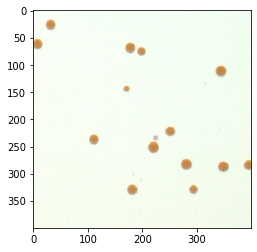

In [2]:
u1='plosPicHQ/q120404-02.jpg' #путь к файлу
I=imread(u1)
# imshow(I);

F=I[800:1200, 810:1210] 
imshow(F);

В середине прямоугольного фрагмента заметна маленькая бледная колония. Допустим, что мы хотим ее посчитать, т.е. получить правильный ответ: 15 колоний. 

Если извлечь зеленый слой и инвертировать его, а затем повращать поверхность так, чтобы было видно столбик для этого светлого пятна, то окажется его высота около 60.

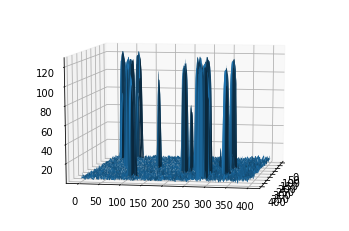

In [3]:
Z=1-F[:,:,1]
X,Y = meshgrid(arange(Z.shape[1]), arange(Z.shape[0]))

fig = figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z);
ax.view_init(10,10)

Найдем 1 контур по-умолчанию. 

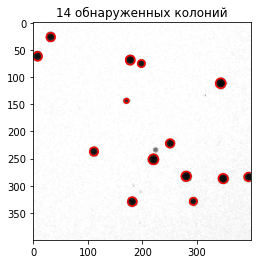

In [4]:
imshow(Z, cmap='gray_r'); 
coco=contour(Z, 1, colors='r') 
n=len(coco.allsegs[1])
title('{} обнаруженных колоний'.format(n));

Если второй аргумент будет массивом с числами, то для каждого из этих чисел будут найдены контуры.

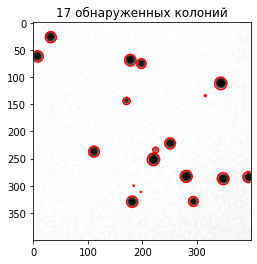

In [5]:
%matplotlib inline
imshow(Z, cmap='gray_r'); 
coco=contour(Z, [20], colors='r') 
n=len(coco.allsegs[0])
title('{} обнаруженных колоний'.format(n));

На уровне 20, что чуть выше уровня шума, найдено на 4 колонии больше.

Попробуйте сами найти оптимальный уровень...

In [6]:
@interact(level=(0,255))
def _scale(level=10):
    imshow(Z, cmap='gray_r'); 
    coco=contour(Z, [level], colors='r')
    n=len(coco.allsegs[0])
    title('{} обнаруженных колоний'.format(n));

interactive(children=(IntSlider(value=10, description='level', max=255), Output()), _dom_classes=('widget-inte…

Наконец построим график зависимости количества контуров от уровня.

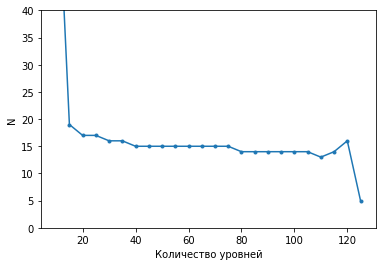

In [7]:
plt.interactive(False) #отменим перерисовку

L = arange(10, 130, 5)
N = [contour(Z, [level], colors='r').allsegs[0].__len__() for level in L]
close() #закроем окно, где рисовались контуры

plt.interactive(True)
plot(L,N, '.-');
ylim(0,40)
xlabel('Количество уровней'); ylabel('N');

Наглядно видно, что искомый ответ 15 достигается на уровне от 40 до 75. Так же видно парадоксальное увеличение обособленных вершин при достижении уровня свыше 100, что соответствует высоте столбиков. Это потому что вершины не гладкие, а покрыты уголочками, как и базовый шум.

Для 2-мерного сглаживания можно использовать разные фильтры, например, 2-мерной гауссианой, т.е. холмиком, в сечение представляющим собой нормальное распределение (гаусианну).

In [8]:
X,Y = meshgrid(arange(Z.shape[1]), arange(Z.shape[0]))
    
@interact(smooth=(2,15,1))
def _view(smooth=5):
    Zf = skimage.filters.gaussian(Z, smooth)
    ax = gcf().add_subplot(111, projection='3d')
    ax.plot_surface(X,Y,Zf);

interactive(children=(IntSlider(value=5, description='smooth', max=15, min=2), Output()), _dom_classes=('widge…

Другая проблема с бликами на прозрачных колониях.

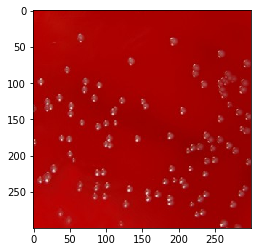

In [9]:
u1='plosPicHQ/neisseria_gonorrhoeae.jpg'
I=imread(u1)
F=I[100:400, 100:400]
imshow(F);

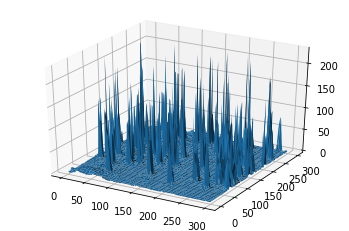

In [10]:
Z=F[:,:,1]

ax = figure().add_subplot(111, projection='3d')
X,Y = meshgrid(arange(Z.shape[1]), arange(Z.shape[0]))
ax.plot_surface(X,Y,Z);

Блики на 3D-картинке выглядят как острые пики.

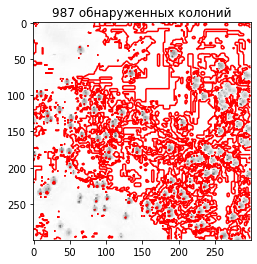

In [11]:
imshow(Z, cmap='gray_r'); 
coco=contour(Z, 1, colors='r') 
n=len(coco.allsegs[0])
title('{} обнаруженных колоний'.format(n));

С 1 контуром по-умолчанию находятся только блики, которые на 3-D.

In [12]:
@interact(level=(0,255))
def _scale(level=25):
    imshow(Z, cmap='gray_r'); 
    coco=contour(Z, [level], colors='r')
    n=len(coco.allsegs[0])
    title('{} обнаруженных колоний'.format(n));

interactive(children=(IntSlider(value=25, description='level', max=255), Output()), _dom_classes=('widget-inte…

На уровне 25 получается правдоподобное число.

Проблему смежных колоний это конечно не решает и нужно или делить площадь контура на среднюю площадь колонии. Или оценивать отклонение формы от круглой, как это было показано в исходном рецепте.

**Вывод**: Можно легко усовершенствовать алгоритм, если включить мозг и поверхностно почитать справку по функции. 
